In [51]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [52]:
class myState(TypedDict):
    no1: int
    no2: int
    opration: str
    final: str
    

In [53]:
def adder (state: myState) -> myState:
    state["final"] = state["no1"] + state["no2"]    
    return state

def subtractor (state: myState) -> myState:
    state["final"] = state["no1"] - state["no2"]    
    return state

def decide_next_node(state: myState) -> str:
    if state["opration"] == "+":
        return "adder_path"
    elif state["opration"] == "-":
        return "subtractor_path"
    

In [54]:
graph = StateGraph(myState) #creating a graph with state of type myState which we defined above
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("decider", lambda state: state) #here we are just taking state and passing it without change as this is just routing which node will gonna execute


In [55]:
graph.add_edge(START, "decider") #from start we are going to decider node and based on the state we will decide which node to execute next
graph.add_conditional_edges(
    "decider",
    decide_next_node,

    {
        "adder_path": "adder",
        "subtractor_path": "subtractor"
    }
    ) #this will add edges from decider to adder and subtractor based on the return value of decide_next_node function       

graph.add_edge("adder", END) #after executing adder we are going to end
graph.add_edge("subtractor", END) #after executing subtractor we are going to end


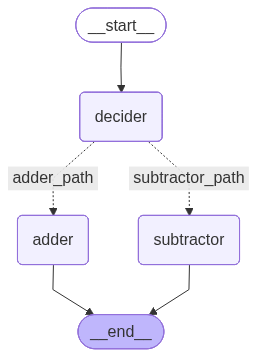

In [56]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [49]:
app = graph.compile()

result = app.invoke({
    "no1": 10,
    "no2": 5,
    "opration": "+"
})
print(result)  

{'no1': 10, 'no2': 5, 'opration': '+', 'final': 15}


In [58]:
#we can call like this as well
initial_state = myState({
    "no1": 10,
    "no2": 5,
    "opration": "-"
})
result = app.invoke(initial_state)
print(result)

{'no1': 10, 'no2': 5, 'opration': '-', 'final': 5}
